In [1]:

import numpy as np
import pandas as pd
#from VoicesDataset import VoicesDataset # A class for data loading.
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def figure_conf_matrix(cm, sdm, filename, title, size_inches = (3.5,3.5)):

  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()]

  group_percentages2 = ["{0:.2%}".format(value) for value in sdm.flatten()]

  labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_percentages, group_percentages2)]
  labels = np.asarray(labels).reshape(3,3)
  

  fig = plt.figure()
  disp = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar= False, annot_kws={"size": 14})
  #disp = sns.heatmap(cm, annot=True,fmt='.2%', cmap="Blues", cbar= False)
  disp.xaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3'], fontsize = 13, horizontalalignment='center')
  disp.yaxis.set_ticklabels(['Type 1', 'Type 2', 'Type 3'], fontsize = 13, verticalalignment='center')
  disp.set_xlabel('Predicted Class', fontsize = 13)
  disp.xaxis.set_label_position('top') 
  disp.xaxis.tick_top()
  disp.set_ylabel('True class', fontsize = 13)
  fig.set_size_inches(size_inches)
  plt.title(title, fontsize = 15)
  plt.savefig(filename +'.pdf',bbox_inches='tight')# , format='svg')

Overall Accuracy = 82.06336633663366 (2.9744367192271195)


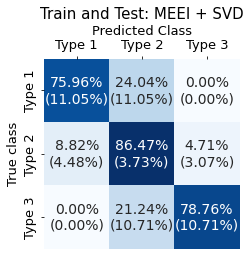

In [3]:
file_path = 'figures/confusion_matrices/'
results_general = pd.read_csv(file_path + 'results_general.csv', index_col = 0)
acc = results_general['Acc'].to_numpy()
print('Overall Accuracy = {} ({})'.format(np.mean(acc)*100,np.std(acc)*100))

cm = results_general.loc[:,'cm_0':'cm_8'].to_numpy()
sdcm = np.std(cm,axis = 0)
cm = np.mean(cm,axis = 0)

cm = cm.reshape((3,3))
filename = file_path + 'cm_results_general'
title = 'Train and Test: MEEI + SVD'
figure_conf_matrix(cm, sdcm, filename, title)


MEEI Accuracy = 83.815987933635 (4.951564779145225)
Cross SAAR Accuracy = 83.36734693877551 (0.45861642967845284)


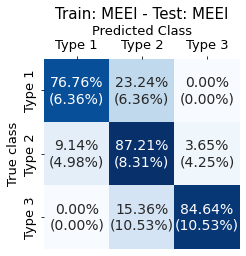

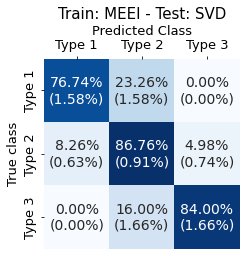

In [4]:
results = pd.read_csv(file_path + 'results_meei.csv', index_col = 0)
results.head()

acc = results['Acc'].to_numpy()
print('MEEI Accuracy = {} ({})'.format(np.mean(acc)*100,np.std(acc)*100))
acc_cross = results['Acc_Cross.'].to_numpy()
print('Cross SAAR Accuracy = {} ({})'.format(np.mean(acc_cross)*100,np.std(acc_cross)*100))


cm = results.loc[:,'cm_0':'cm_8'].to_numpy()
sdcm = np.std(cm,axis = 0)
cm = np.mean(cm,axis = 0)
cm = cm.reshape((3,3))
filename = file_path + 'cm_results_meei'
title = 'Train: MEEI - Test: MEEI'
figure_conf_matrix(cm, sdcm, filename, title)


cm = results.loc[:,'cm_cross0':'cm_cross8'].to_numpy()
sdcm = np.std(cm,axis = 0)
cm = np.mean(cm,axis = 0)
cm = cm.reshape((3,3))
filename = file_path + 'cm_results_cross_saar'
title = 'Train: MEEI - Test: SVD'
figure_conf_matrix(cm, sdcm, filename, title)


SAAR Accuracy = 85.51020408163265 (3.9202801453670535)
Cross MEEI Accuracy = 82.90944123314065 (0.47235648062162766)


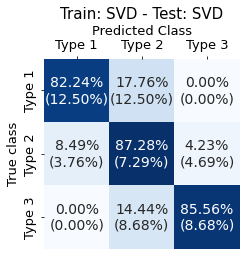

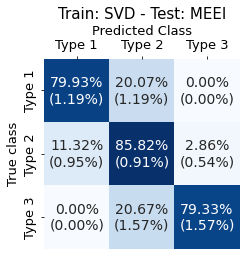

In [5]:
results = pd.read_csv(file_path + 'results_saar.csv', index_col = 0)

acc = results['Acc'].to_numpy()
print('SAAR Accuracy = {} ({})'.format(np.mean(acc)*100,np.std(acc)*100))
acc_cross = results['Acc_Cross.'].to_numpy()
print('Cross MEEI Accuracy = {} ({})'.format(np.mean(acc_cross)*100,np.std(acc_cross)*100))


cm = results.loc[:,'cm_0':'cm_8'].to_numpy()
sdcm = np.std(cm,axis = 0)
cm = np.mean(cm,axis = 0)
cm = cm.reshape((3,3))
filename = file_path + 'cm_results_saar'
title = 'Train: SVD - Test: SVD'
figure_conf_matrix(cm, sdcm, filename, title)

cm = results.loc[:,'cm_cross0':'cm_cross8'].to_numpy()
sdcm = np.std(cm,axis = 0)
cm = np.mean(cm,axis = 0)
cm = cm.reshape((3,3))
filename = file_path + 'cm_results_cross_meei'
title = 'Train: SVD - Test: MEEI'
figure_conf_matrix(cm, sdcm, filename, title)